In [114]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import arma_order_select_ic
pd.set_option('display.max_rows', 30)

In [115]:
# copied from pre_processing.ipynb
def extract_by_value(data, column, value):
    """ Return the data with given value in the specified column
    """
    if not column in data.columns:
        raise ValueError('The column name is incorrect!')
    return data[data[column] == value]

In [116]:
# convert to datetime
def parser(time):
    return pd.to_datetime(time)

In [117]:
# load market training data [time, assetCode, volume, return]
market_train = pd.read_csv("./market_train_df.csv", parse_dates = [0], date_parser = parser, usecols = [0, 1, 3, 9])

In [118]:
# take Apple Inc AAPL.O as an example
apple_ts = extract_by_value(market_train, 'assetCode', 'AAPL.O')[['time', 'returnsOpenPrevMktres1']]
apple_ts = apple_ts[1:] # delete the first date which has return NaN
apple_ts['time'] = apple_ts['time'].apply(lambda x : x.date()) # extract dates
apple_ts

,time,returnsOpenPrevMktres1
1421,2007-02-02,-0.026983
2844,2007-02-05,0.001477
4272,2007-02-06,0.002135
5702,2007-02-07,0.000392
7134,2007-02-08,0.010226
8562,2007-02-09,0.006735
9994,2007-02-12,-0.009432
11428,2007-02-13,0.012093
12860,2007-02-14,-0.012470
14293,2007-02-15,0.000738


Text(0.5,1,'Daily Return of AAPL.O')

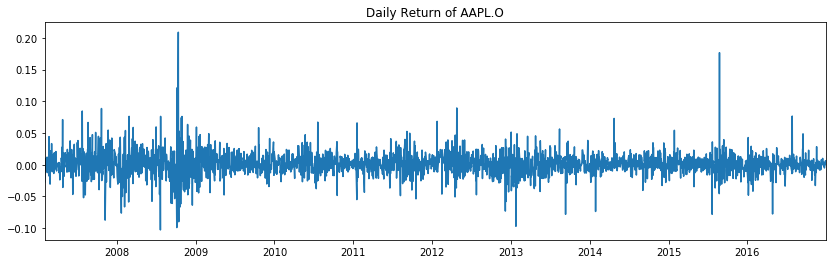

In [119]:
# plot the time series of apple returns
plt.figure(figsize = (14,4))
plt.plot(apple_ts.time, apple_ts.returnsOpenPrevMktres1)
plt.xlim([datetime.date(2007,2,2), datetime.date(2016,12,30)])
plt.title('Daily Return of AAPL.O')

In [120]:
# check the mean daily return of apple: 0.11% 
apple_return = apple_ts.returnsOpenPrevMktres1
np.mean(apple_return)

0.0010911192043861534

(0, 50)

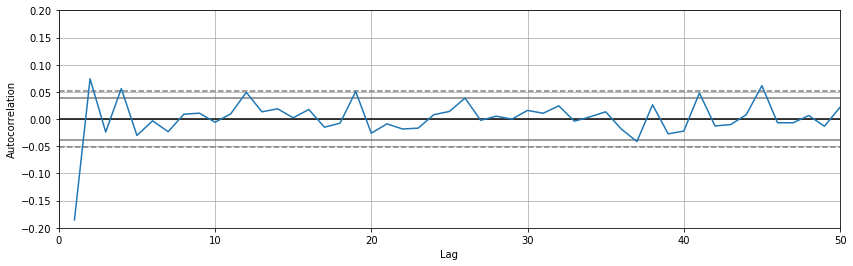

In [121]:
# Autocorrelation function: the horizontal dashed lines correspond to 99% confidence bands. 
plt.figure(figsize = (14,4))
autocorrelation_plot(apple_return)
plt.ylim([-0.2, 0.2])
plt.xlim([0, 50])

In [122]:
# find the best parameters for the ARIMA model using AIC criteria
res_ic = arma_order_select_ic(apple_return, ic = ['aic', 'bic'])
print(res_ic.aic_min_order)
print(res_ic.bic_min_order)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

(4, 0)
(1, 0)


predicted=0.001327, expected=0.003692
predicted=0.001352, expected=0.011479
predicted=0.001296, expected=-0.004818
predicted=0.001342, expected=-0.005319
predicted=0.001297, expected=0.012866
predicted=0.001314, expected=-0.003518
predicted=0.001305, expected=-0.078109
predicted=0.001282, expected=0.002405
predicted=0.001329, expected=0.003250
predicted=0.001294, expected=-0.018585
predicted=0.001321, expected=-0.028948
predicted=0.001328, expected=0.034608
predicted=0.001300, expected=0.007706
predicted=0.001304, expected=0.017670
predicted=0.001331, expected=0.037115
predicted=0.001299, expected=-0.001300
predicted=0.001149, expected=-0.011662
predicted=0.001291, expected=-0.005614
predicted=0.001234, expected=-0.004170
predicted=0.001236, expected=-0.015582
predicted=0.001193, expected=0.002548
predicted=0.001312, expected=0.016015
predicted=0.001248, expected=0.009917
predicted=0.001316, expected=-0.014364
predicted=0.001340, expected=0.005859
predicted=0.001281, expected=0.006394


predicted=0.001273, expected=-0.018285
predicted=0.001260, expected=0.017631
predicted=0.001280, expected=0.003891
predicted=0.001287, expected=0.009409
predicted=0.001301, expected=0.001831
predicted=0.001279, expected=-0.020143
predicted=0.001279, expected=-0.009909
predicted=0.001278, expected=0.008034
predicted=0.001319, expected=-0.002699
predicted=0.001278, expected=0.003326
predicted=0.001263, expected=0.015647
predicted=0.001307, expected=-0.000342
predicted=0.001283, expected=0.012784
predicted=0.001310, expected=0.014628
predicted=0.001291, expected=-0.005646
predicted=0.001258, expected=-0.008556
predicted=0.001266, expected=-0.000048
predicted=0.001283, expected=0.017637
predicted=0.001270, expected=-0.016186
predicted=0.001285, expected=0.005282
predicted=0.001301, expected=0.003332
predicted=0.001282, expected=0.001197
predicted=0.001310, expected=-0.003152
predicted=0.001310, expected=0.006708
predicted=0.001288, expected=0.001221
predicted=0.001282, expected=0.005168
pr

predicted=0.001303, expected=0.009471
predicted=0.001300, expected=-0.000902
predicted=0.001318, expected=-0.004857
predicted=0.001291, expected=0.012114
predicted=0.001311, expected=-0.004132
predicted=0.001295, expected=0.002060
predicted=0.001314, expected=0.008491
predicted=0.001287, expected=0.010817
predicted=0.001294, expected=-0.003904
predicted=0.001303, expected=-0.000881
predicted=0.001311, expected=-0.003552
predicted=0.001301, expected=0.008247
predicted=0.001296, expected=-0.011469
predicted=0.001317, expected=0.006015
predicted=0.001293, expected=-0.009354
predicted=0.001308, expected=0.009362
predicted=0.001311, expected=-0.003074
predicted=0.001320, expected=-0.009302
predicted=0.001303, expected=0.008173
predicted=0.001308, expected=-0.004816
predicted=0.001298, expected=-0.008394
predicted=0.001317, expected=-0.006316
predicted=0.001286, expected=0.011607
predicted=0.001315, expected=-0.002250
predicted=0.001282, expected=-0.006001
predicted=0.001317, expected=-0.005

predicted=0.001192, expected=0.000221
predicted=0.001175, expected=-0.006768
predicted=0.001161, expected=-0.006756
predicted=0.001188, expected=0.011728
predicted=0.001165, expected=-0.003727
predicted=0.001185, expected=0.003257
predicted=0.001153, expected=-0.009738
predicted=0.001200, expected=0.025616
predicted=0.001179, expected=0.007114
predicted=0.001186, expected=-0.005480
predicted=0.001180, expected=0.007188
predicted=0.001170, expected=-0.003111
predicted=0.001168, expected=0.013266
predicted=0.001187, expected=-0.008252
predicted=0.001170, expected=-0.002238
predicted=0.001182, expected=-0.001451
predicted=0.001161, expected=0.006083
predicted=0.001206, expected=0.001215
predicted=0.001185, expected=-0.002201
predicted=0.001182, expected=0.004271
predicted=0.001191, expected=-0.026056
predicted=0.001177, expected=-0.018615
predicted=0.001201, expected=-0.014421
predicted=0.001174, expected=0.002418
predicted=0.001184, expected=-0.011824
predicted=0.001178, expected=0.00115

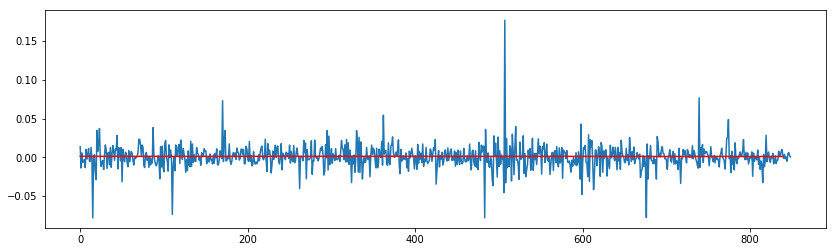

In [123]:
# rolling forecast using ARMA model
from sklearn.metrics import mean_squared_error
X = apple_return.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions, direction = list(), list()
for t in range(len(test) - 9):
    model = ARMA(history, order = (4, 0)) # choose order from aic_min_order or bic_min_order
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(10)
    yhat = output[0][9]
    predictions.append(yhat)
    obs = test[t + 9]
    direction.append(np.sign(yhat) == np.sign(obs))
    history.append(test[t])
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test[9:], predictions)
print('Test MSE: %.6f' % error)

# plot
plt.figure(figsize = (14,4))
plt.plot(test)
plt.plot(predictions, color = 'red')

In [127]:
# check the accuracy rate of correct prediction of signs
accuracy = sum(direction) / (len(test) - 9)
print('accuracy rate of 10-day leading return prediction is: ' + '{0:.1%}'.format(accuracy))

accuracy rate of 10-day leading return prediction is: 50.1%


In [ ]:
# RECORDS: next day forecast results
# AAPL.O: 54%
# AAP.N: 53%